<img style = "float: left; margin: 30px 15px 15px 15px;" src = "https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. 

**Nombres:** Moisés Flores Ortiz y Miriam Eunice Rosas Medellín.

**Fecha:** 17 de marzo del 2021.

**Expediente** : 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MoyMFO/proyecto_modulo1
# Proyecto TEMA-2

___
### 1.1 Título del trabajo.
Pronóstico del comportamiento de Covid-19 en México.

### 1.2 Objetivos.
#### 1.1 Objetivo general.
- Crear una simulación que permita pronosticar el comportamiento del Covid-19 en México y que haga posible determinar un tipo de cuarentena que minimice sus efectos económicos pero también minimice el riesgo epidémico.

#### 1.2 Objetivos específicos
- Encontrar una distribución de probabilidad adecuada que se ajuste a los datos.
- Realizar una simulación de cuatro diferentes variables que conforman el comportamiento del Covid-19.
- Pronósticar el comportamiento de Covid-19 en México en los próximos 30 días según qué tan estricta es la cuarentena.
- Generar rangos y cardinalidad para la estimación de riesgo epidémico poblacional.
- Determinar qué tipo de cuarentena dependiendo el porcentaje de movilidad garantiza un riesgo bajo.

### 1.3 Definición del problema.
El virus SARS-CoV-2, a través de la enfermedad Covid-19, ha desencadenado a nivel mundial múltiples fallecimientos en el contexto de la presente pandemia, la cual hasta ahora ha durado casi un año entero. Sin embargo, diferentes factores han hecho que en algunos países haya más casos confirmados y decesos que en otros. Algunos de estos factores están enteramente en manos del gobierno, otros son más culturales y son responsabilidad de los ciudadanos, y otros tantos no pueden ser controlados por nadie. Sean cuales sean estos factores en concreto, lo cierto es que México actualmente es el quinceavo país en el mundo con más muertes por millón de habitantes (OMS, 2020). A su vez, nuestro país es el que cuenta con la segunda tasa de letalidad más alta entre todos los países de América Latina y el Caribe.

En este contexto, se desarrollará un modelo de simulación que permita pronosticar la evolución de cuatro diferentes variables que describen el comportamiendo del Covid-19: casos confirmados, casos sospechosos, hospitalizados y defunciones; para así poder tomar decisiones acertadas acerca de los lineamientos de la cuarentena, que permitan mitigar los efectos tanto económicos como de salud pública que puedan ser provocados por la dinámica de la epidemia. Se considerará viable establecer niveles de riesgo epidémico conforme a rangos distribuidos en cuartiles para cada una de las variables utilizadas en la simulación. Además, se elegirá como estrategia, la cuarentena menos restrictiva de todas las que hagan posible llegar a un riesgo bajo antes de los próximos 30 días.

**Los supuestos son**:
- Los datos recopilados de las variables son reales.
- Se toman los datos a partir del 31 de diciembre del 2019, fecha en la cual se empezaron a recolectar los datos.
- La tasa de movilidad de los escenarios se toma sobre la movilidad real.
- La población que no se moviliza no se contagia ni se hace pruebas.
- La relación de todas las variables con riesgo epidémico es positiva.
- Todas las variables tienen el mismo peso en la estimación del riesgo epidémico.
- La cuarentena menos restrictiva minimiza sus estragos económicos.

### 1.4 Nodos y variables que se decidieron simular y porqué
**Escenarios de simulación**:
- Escenario 1 (cuarentena nula):     100% de la población total se moviliza durante 30 días.
- Escenario 2 (cuarentena flexible): 50% de la población total se moviliza durante 30 días.
- Escenario 3 (cuarentena moderada): 25% de la población total se moviliza durante 30 días.
- Escenario 4 (cuarentena nula):     100% de la población total se moviliza durante 30 días.

**Variables de simulación**:
- Casos confirmados: Personas que cumplan con la definición operacional de caso sospechoso y que cuenten con diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el Instituto de Diagnóstico y Referencia Epidemiológicos (InDRE).
- Hospitalizados: Personas que cuentan con un diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el InDRE y que han sido ingresados a una unidad hospitalaria.
- Defunciones: Personas que después de obtener un diagnóstico confirmado, fallecen a causa de la enfermedad.
- Casos sospechosos: Personas de cualquier edad que en los últimos 7 días hayan presentado al menos dos de los siguientes signos y síntomas:
  - Tos, fiebre o dolor de cabeza. <br>
    Acompañados de al menos uno de los siguientes signos o síntomas:
  - Dificultad para respirar (dato de alarma)
  - Dolor en las articulaciones
  - Dolor muscular
  - Dolor de garganta 
  - Escurrimiento nasal
  - Conjuntivitis (enrojecimiento, picazón y ojos llorosos)
  - Dolor en el pecho (IMSS, s. f.)

Cada variable se va a simular en cada uno de los escenarios de simulación planteados previamente, con el objetivo de ubicar cada una en un cuartil que defina su cardinalidad en el riesgo epidémico poblacional. Posteriormente, crear un indicador con la sumatoria de las cardinalidades de cada una de las variables, y determinar con él el riesgo epidémico asociado a cada nodo. Las clasificaciones de riesgo son las siguientes:
- Bajo: se puede salir pero con precaución y prevención.
- Moderado: hay más actividades, pero con precaución.
- Alto: preferentemente, no salir si no es estrictamente necesario.
- Máximo: salir solamente si se trata de necesidades básicas.

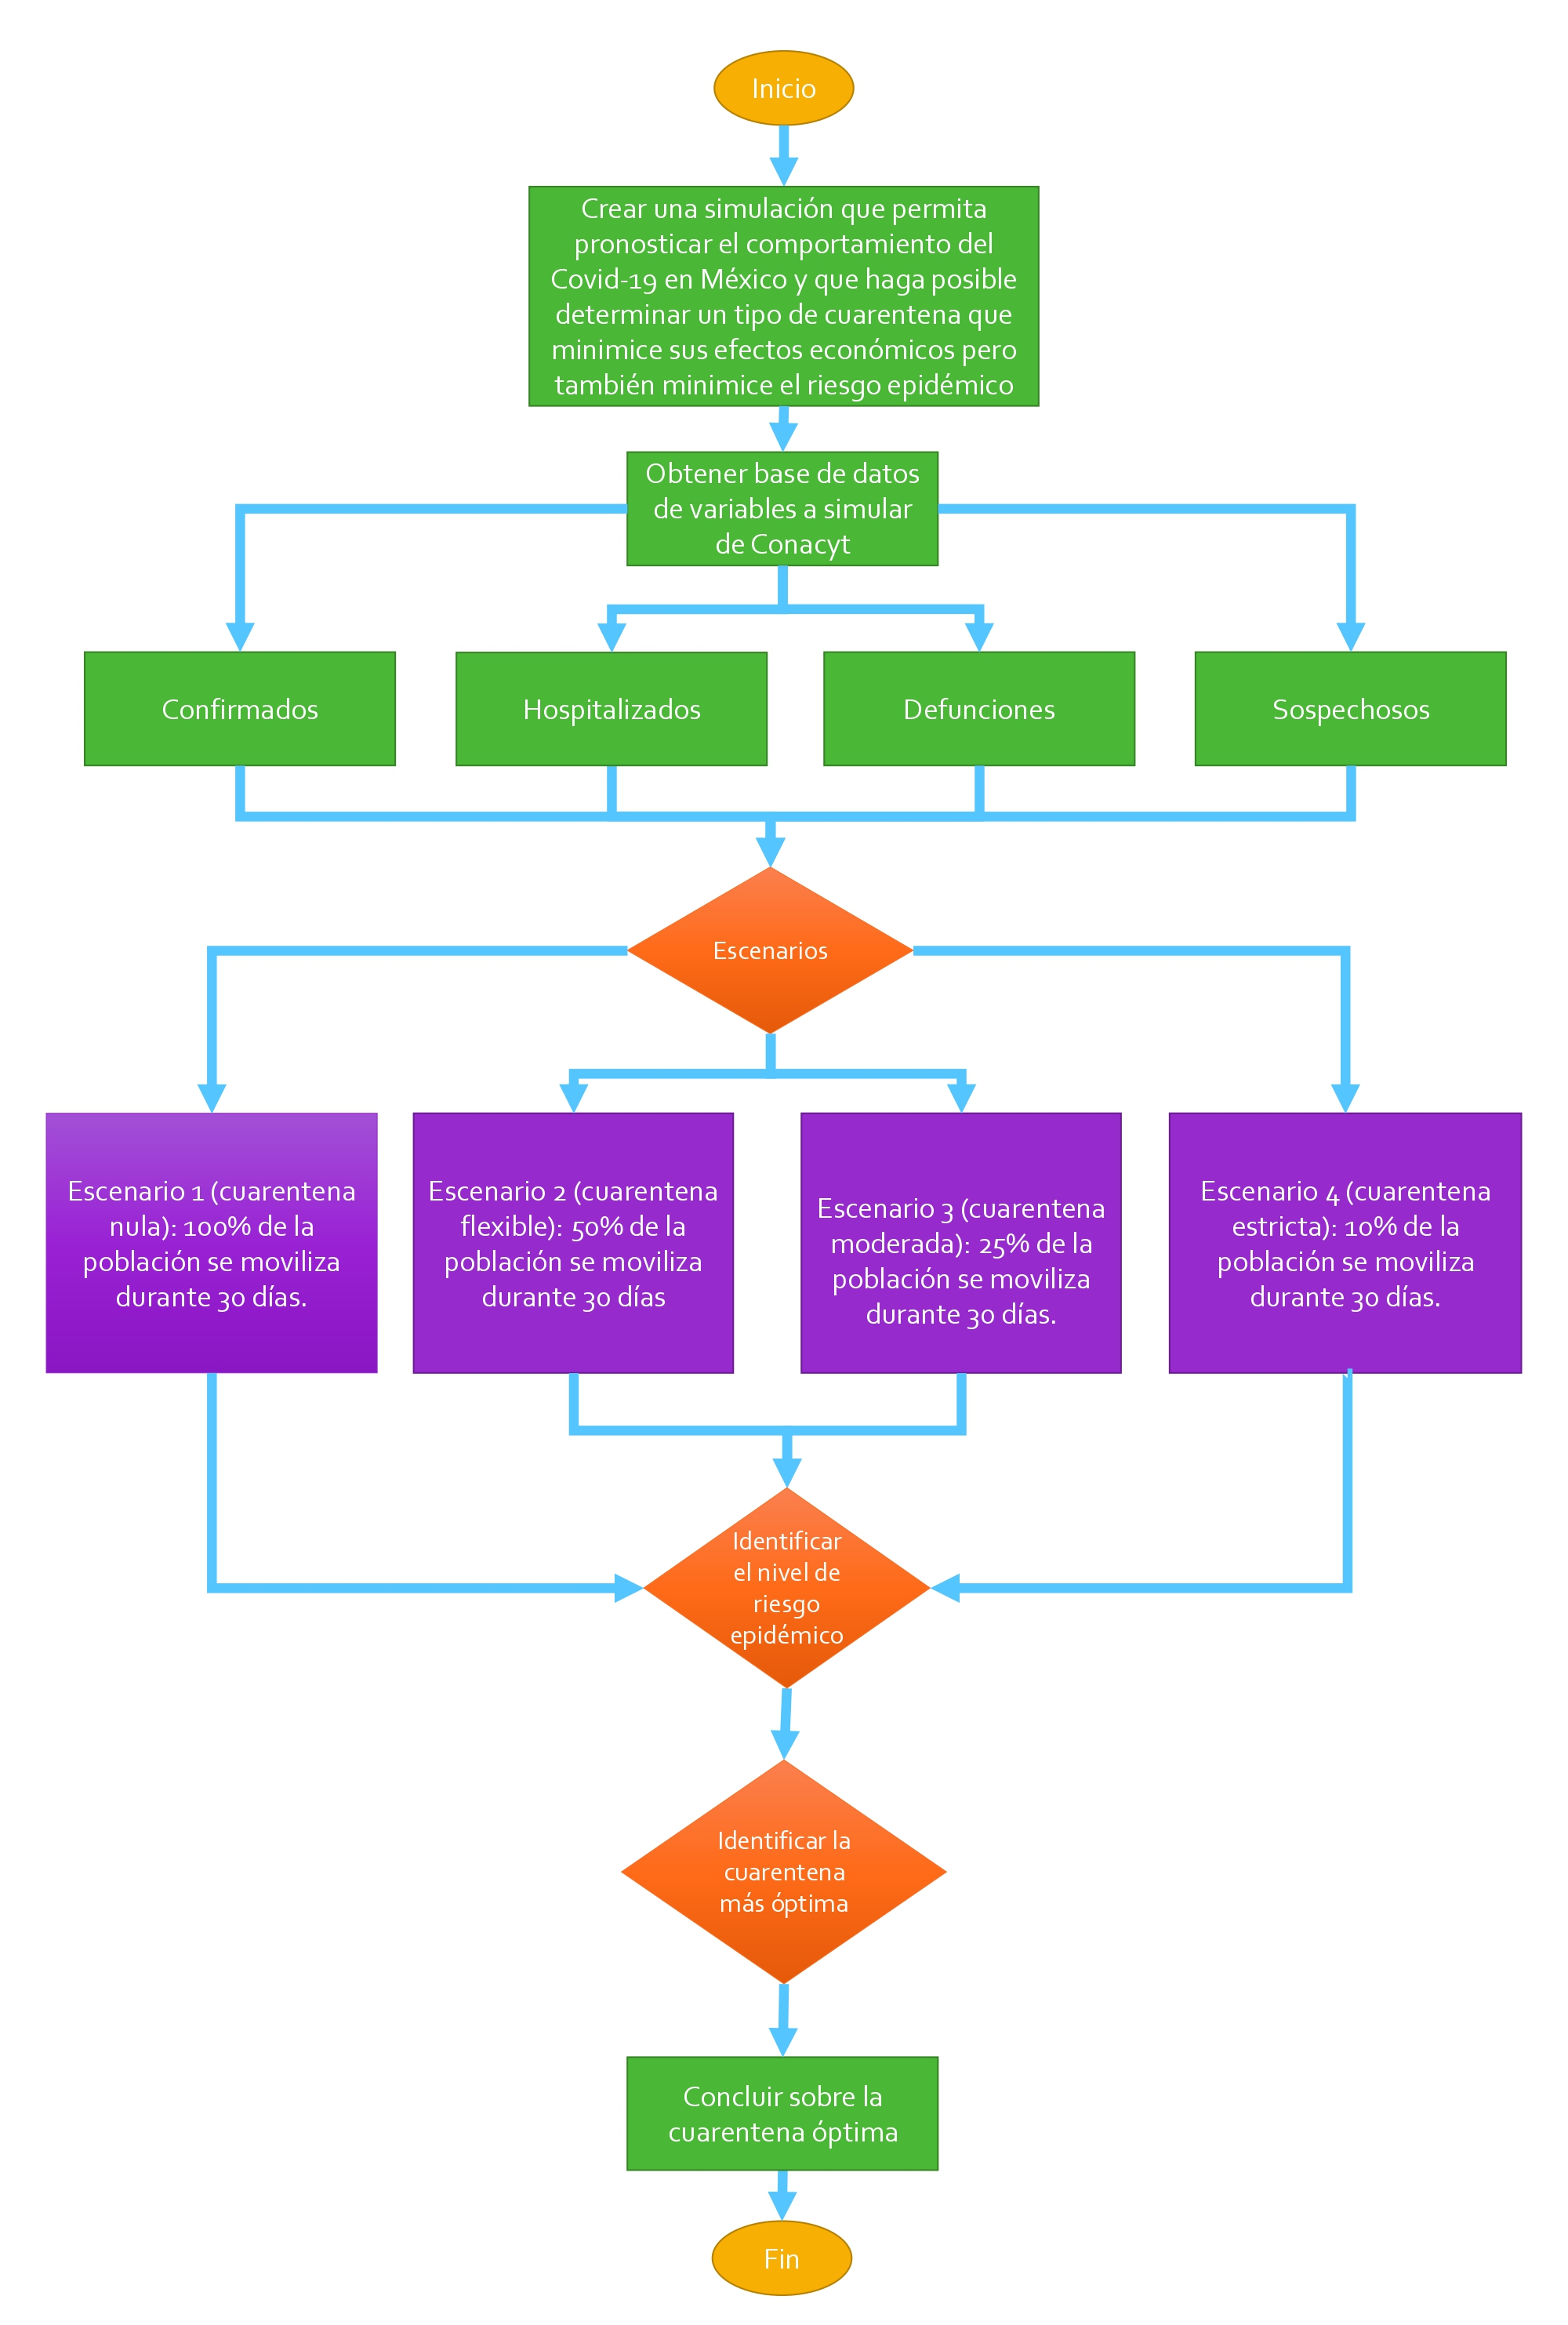

### 1.6 Obtención de bases de datos
La base de datos que utilizaremos se encuentra en la página del Conacyt (referencia número 1). El archivo de excel con los datos cargados también se encuentra en el repositorio de GitHub del proyecto. La base de datos esta preparada para ser usada.

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import scipy.stats as st
import statsmodels.api as sm 
import datetime
from collections import Counter
import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy import optimize
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from fitter import Fitter
%matplotlib inline

In [2]:
# Mostrar dataframe
data = pd.read_excel("DATOS_COVID-19.xlsx", sheet_name = "Sheet1")
data.set_index("Fecha", inplace = True)
data.head(10)

,Confirmados,Hospitalizados,Defunciones,Sospechosos
Fecha,,,,
2019-12-31,0,0,0,0
2020-01-01,0,36,0,11
2020-01-02,0,129,0,57
2020-01-03,0,212,0,123
2020-01-04,0,80,0,35
2020-01-05,0,138,0,57
2020-01-06,0,326,0,159
2020-01-07,0,363,0,178
2020-01-08,0,380,0,212


In [3]:
# Calcular medias móviles para suavizar series
data["SMA7 Confirmados"] = data["Confirmados"][51:].rolling(7, center = True).mean()
data["SMA7 Hospitalizados"] = data["Hospitalizados"][1:].rolling(7, center = True).mean()
data["SMA7 Defunciones"] = data["Defunciones"][55:].rolling(7, center = True).mean()
data["SMA_Sospechosos"] = data["Sospechosos"][1:].rolling(7, center = True).mean()

In [4]:
# Mostrar nuevas columnas
data.head(10)

,Hospitalizados,Confirmados,Defunciones,Sospechosos,SMA7 Hospitalizados,SMA7 Confirmados,SMA7 Defunciones,SMA_Sospechosos
Fecha,,,,,,,,
2019-12-31,0,0,0,0,NaN,NaN,NaN,NaN
2020-01-01,36,0,0,11,NaN,NaN,NaN,NaN
2020-01-02,129,0,0,57,NaN,NaN,NaN,NaN
2020-01-03,212,0,0,123,NaN,NaN,NaN,NaN
2020-01-04,80,0,0,35,183.428571,NaN,NaN,88.571429
2020-01-05,138,0,0,57,232.571429,NaN,NaN,117.285714
2020-01-06,326,0,0,159,267.571429,NaN,NaN,135.428571
2020-01-07,363,0,0,178,286.285714,NaN,NaN,145.571429
2020-01-08,380,0,0,212,288.142857,NaN,NaN,147.428571


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.


#### <font color = "blue"> Nodo 1: 100% de la población se moviliza durante 30 días (cuarentena nula) <font color>

##### Variable: Confirmados

In [5]:
# Se obtienen de la base de datos los casos confirmados (DataFrame)
data_confirmados = pd.DataFrame(data["SMA7 Confirmados"]).dropna().astype("int")
data_confirmados.head(10)

,SMA7 Confirmados
Fecha,
2020-02-23,0
2020-02-24,1
2020-02-25,1
2020-02-26,2
2020-02-27,2
2020-02-28,2
2020-02-29,2
2020-03-01,2
2020-03-02,2


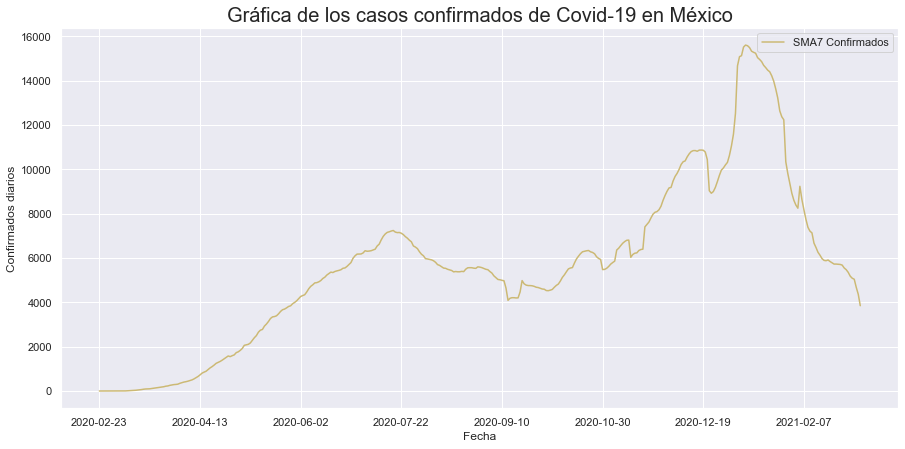

In [6]:
# Gráfica de los datos
def graficar_datos(datos: "recibe un dataframe de los datos", titulo: "título de la gráfica", labely = "nombre del eje y"):
    """Esta función regresa una gráfica de los datos ingresados."""
    datos.plot(figsize = [15, 7], color = "y")
    plt.title(titulo, fontsize = 20)
    plt.xlabel("Fecha", fontsize = 12)
    plt.ylabel(labely, fontsize = 12)
    plt.show()
graficar_datos(data_confirmados, "Gráfica de los casos confirmados de Covid-19 en México", "Confirmados diarios")

In [43]:
# Obtener bandwidth adecuado con KernelDensity()
def bandwidth_KernelD(datos: "recibe un array"):
    """Esta función regresa el bandwidth estimado con las librerías KernelDensity y GridSearchCV."""
    x = np.array(datos) # Se convierten a un arreglo los datos confirmados
    x = x.flatten() # Cambiamos el array a dimensión 1 x n
    grid = GridSearchCV(KernelDensity(), {"bandwidth": np.linspace(0.1, datos.max(), 200)}, cv = 20) # validación
    grid.fit(x[:, None])
    return grid.best_params_
x1 = np.array(data_confirmados).flatten()
bandwith_ker1 = bandwidth_KernelD(x1)
bandwith_ker1

{'bandwidth': 941.2195979899498}

In [44]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
def bandwidth_KDEM(datos: "debe ser un array"):
    """Esta función regresa el bandwidth estimado con la librería de KDEMultivariate."""
    kde_multivariate = KDEMultivariate(data = datos, var_type = "c", bw = "cv_ls")
    return kde_multivariate.bw
bandwidth_opt1 = bandwidth_KDEM(x1)
bandwidth_opt1

array([220.86069907])

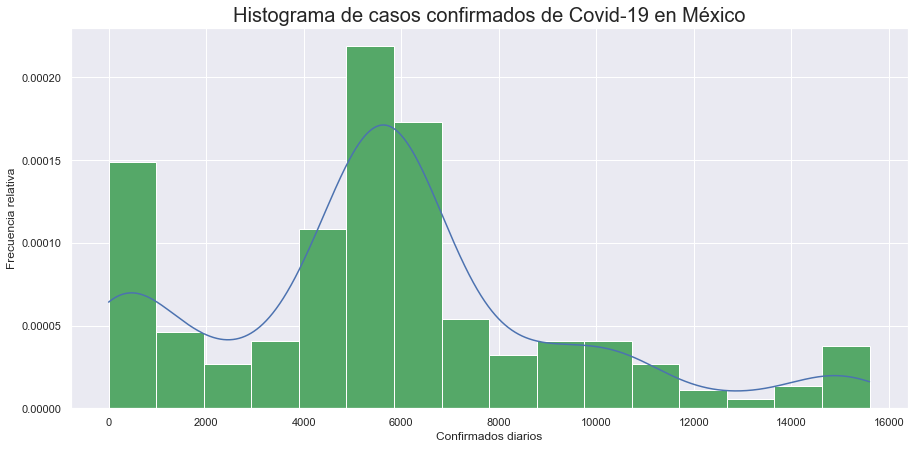

(<function __main__.hist_vs_sklearn.<locals>.<lambda>(datos)>,
 array([    0,     1,     2, ..., 15604, 15605, 15606]))

In [45]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
def hist_vs_sklearn(bandwidth: "bandwith obtenido con KDEMUltivariate", datos: "debe ser un array", 
                   titulo: "título de la gráfica generada", xlabel: "nombre del eje x"):
    """Esta función regresa una gráfica del histograma de los datos usando el KDEMultivariate junto con una función de densidad
    generada."""
    kde_sklearn = KernelDensity(bandwidth = bandwidth, kernel = "gaussian").fit(datos[:, np.newaxis])
    f_skle = lambda datos: np.exp(kde_sklearn.score_samples(datos[:, None])) # Función de densidad g(x)
    x_grid = np.arange(datos.min(), datos.max())
    plt.figure(figsize = [15, 7])
    plt.plot(x_grid, f_skle(x_grid))
    plt.hist(datos, bins = int(datos.max() / bandwidth), density = True, color = "g")
    plt.title(titulo, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel("Frecuencia relativa", fontsize = 12)
    plt.show()
    return f_skle, x_grid
hist1 = hist_vs_sklearn(bandwith_ker1["bandwidth"], x1, "Histograma de casos confirmados de Covid-19 en México", 
                        "Confirmados diarios")
hist1

,sumsquare_error,aic,bic,kl_div
dweibull,2.128207e-08,333.252701,-8927.700526,0.151854
gennorm,2.179413e-08,333.082379,-8918.689471,0.159636
dgamma,2.194727e-08,333.768549,-8916.035778,0.159798
cauchy,2.295811e-08,336.539994,-8904.907478,0.174578
laplace,2.490336e-08,329.555468,-8874.082800,0.177253


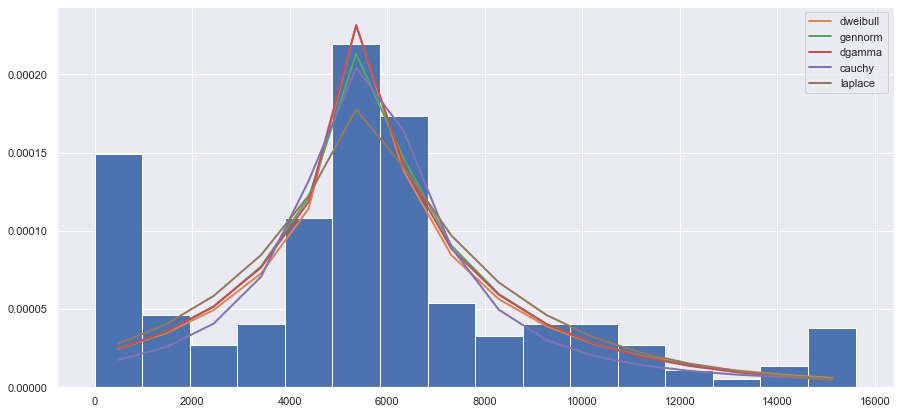

In [41]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
def fitter(data: "debe ser una array", bins: "número de clases"):
    """Esta función utiliza la librería Fitter para obtener las distribuciones que mejor se ajustan a los datos"""
    fitter1 = Fitter(data, bins = bins, timeout = 10, density = True)
    fitter1.fit()
    plt.figure(figsize = [15, 7])
    return fitter1.summary()
fitter(x1, 16)

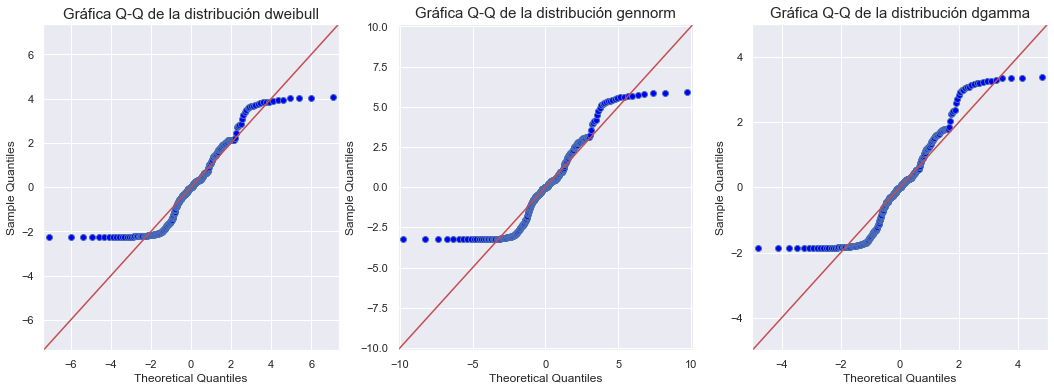

In [42]:
# Gráficas cuartil cuartil
def graficas_qq(best: "las distribuciones que mejor se ajustaron", data: "debe ser un array"):
    """Esta función regresa las gráficas cuartil cuartil de las distribuciones dadas y los datos reales"""
    fig, axs = plt.subplots(1, 3, figsize = [18, 6])
    for i in range(len(best)):
        sm.qqplot(data, dist = getattr(st, best[i]), line = "45", fit = True, ax = axs[i])
        axs[i].set_title(f"Gráfica Q-Q de la distribución {best[i]}", fontsize = 15)
best1 = ["dweibull", "gennorm", "dgamma"]
graficas_qq(best1, x1)

In [64]:
def Acep_rechazo(R2: "Variables distruidas U ~ U(0, 1)", R1: "Variables distribuidas como g(x)",
                 f: "Función objetivo a generar", t: "Función que mayor a f", data: "debe ser un array"):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    cont = 0
    x = []
    i = 0
    while cont < len(data):
        if condition[i]:
            plt.plot(R1[i], R2[i] * t_x[i], "om")
            x.append(R1[i])
            cont += 1
        else:
            plt.plot(R1[i], R2[i] * t_x[i], "oc") 
        i += 1
    plt.show()
    return x

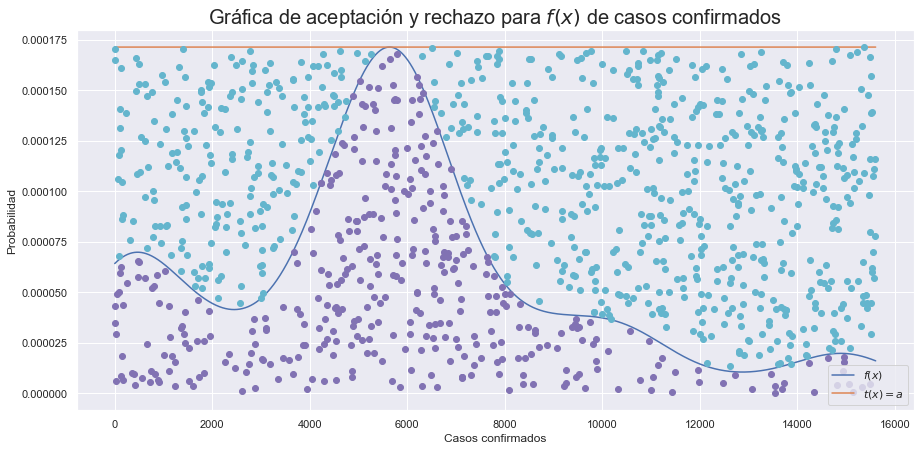

In [65]:
np.random.seed(4567)
def grafica_acep_rechazo(x_grid: "x_grid", f_skle: "función de densidad generada", objetivo: "número cercano al máximo",
                        xlabel: "título del eje x", titulo: "título de la gráfica"):
    """Esta función regresa una gráfica de los puntos aceptados y rechazados."""
    plt.figure(figsize = [15, 7])
    plt.title(titulo, fontsize = 20)
    plt.ylabel("Probabilidad", fontsize = 12)
    plt.xlabel(xlabel, fontsize = 12)
    xa = x_grid
    f = f_skle
    a = f(optimize.fmin(lambda xa: -f(xa), objetivo, disp = False))
    t = lambda xa: a * np.ones([len(xa)])
    plt.plot(xa, f(xa), label = "$f(x)$")
    plt.plot(xa, t(xa), label = "$t(x) = a$")
    plt.legend(loc = "best");
    return f, t
graf1 = grafica_acep_rechazo(hist1[1] , hist1[0], 6000, "Casos confirmados", 
                             "Gráfica de aceptación y rechazo para $f(x)$ de casos confirmados")
graf1

# Validación del método con reducción de varianza por números complementarios
N = 1200 # número de puntos a simular, creemos que aceptará aproximadamente 1200
r2_i = np.random.rand(int(N / 2)) # como estoy tomando t(x) constante solo es necesario generar valores aleatorios U ~ (0, 1)
r2_c = 1 - r2_i
R2 = np.concatenate([r2_i, r2_c])
R1 = np.random.uniform(x1.min(), x1.max(), size = N)
V_A1 = Acep_rechazo(R2, R1, graf1[0] , graf1[1], x1)

In [69]:
# Prueba chi-cuadrada
def prueba_chi2(data: "debe ser un array", best: "lista de las distribuciones que mejor se ajustan", 
                va: "variable aleatoria generada en el método de aceptación y rechazo", bins: "número de clases"):
    """Esta función retorna los resultados de la prueba de Chi cuadrada."""
    observada_kernel = np.histogram(data, bins = (1 + int(np.log2(len(data)))), density = True)[0] # regla de Sturges
    esperada_kernel =  np.histogram(va, bins = (1 + int(np.log2(len(va)))), density = True)[0]
    print(f" Resultado de Chi2 con KDEMultivariate: {st.chisquare(f_obs = observada_kernel, f_exp = esperada_kernel, axis = 0)}"
         )
    for dist in best:
        observada = np.histogram(data, bins = (1 + int(np.log2(len(data)))), density = True)[0]
        params = getattr(st, dist).fit(data)
        rvs = getattr(st, dist)(*params).rvs(len(data))
        esperada =  np.histogram(rvs, bins = (1 + int(np.log2(len(rvs)))), density = True)[0]
        Chi_est = st.chisquare(f_obs = observada, f_exp = esperada, axis = 0)
        print(f"\n Resultado de Chi2 para la distribución {dist}: {Chi_est}")
chi2_1 = prueba_chi2(x1, best1, V_A1)
chi2_1

 Resultado de Chi2 con KDEMultivariate: Power_divergenceResult(statistic=0.00013120544443568586, pvalue=1.0)

 Resultado de Chi2 para la distribución dweibull: Power_divergenceResult(statistic=inf, pvalue=0.0)

 Resultado de Chi2 para la distribución gennorm: Power_divergenceResult(statistic=inf, pvalue=0.0)

 Resultado de Chi2 para la distribución dgamma: Power_divergenceResult(statistic=inf, pvalue=0.0)


In [67]:
# Prueba de Kolmogorov
def prueba_kolmogorov(data: "debe ser un array", best: "lista de las distribuciones que mejor se ajustan",
                     va: "variable aleatoria generada en el método de aceptación y rechazo"):
    """Esta función retorna los resultados de la prueba de Kolmogorov-Smirnov."""
    print(f" Resultado de Kolmogorv-Smirnov con KDEMultivariate: {st.kstest(data, va)}")
    for dist in best:
        params = getattr(st, dist).fit(data)
        kolmogorov = st.kstest(data, dist, args = params)
        print(f"\n Resultado de Kolmogorov-Smirnov para la distribución {dist}: {kolmogorov}")
prueba_kolmogorov(x1, best1, V_A1)

 Resultado de Kolmogorv-Smirnov con KDEMultivariate: KstestResult(statistic=0.08179419525065963, pvalue=0.15843109096362146)

 Resultado de Kolmogorov-Smirnov para la distribución dweibull: KstestResult(statistic=0.06944214162600079, pvalue=0.0492803098689335)

 Resultado de Kolmogorov-Smirnov para la distribución gennorm: KstestResult(statistic=0.06913819672875904, pvalue=0.050891895907408946)

 Resultado de Kolmogorov-Smirnov para la distribución dgamma: KstestResult(statistic=0.07580781708557546, pvalue=0.024317054429565443)


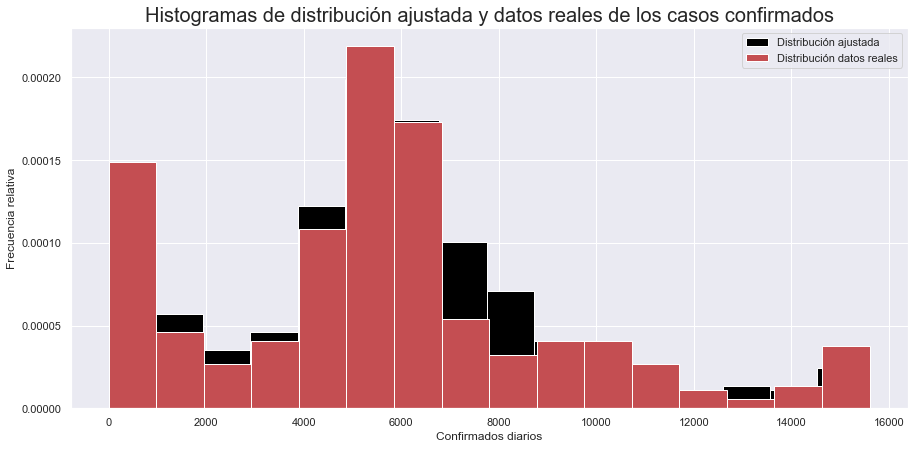

In [72]:
# Comparación de histogramas
def histreal_vs_histva(data: "debe ser un array", titulo: "título de la gráfica", xlabel: "nombre del eje x", 
                       bins: "número de clases", va: "variable aleatoria generada en el método de aceptación y rechazo" = None, 
                       dist: "distribución elegida" = None):
    """Esta función retorna en una sóla gráfica el histograma con la distribución ajustada y con los datos reales con propósitos
    de comparación. Hay que tener en cuenta que si se le pasa una 'va' a la función, esto quiere decir que se elegió la función
    de distribución de KDEMultivariate, entonces no se le pasa un 'dist'. Si se le pasa un 'dist', quiere decir que se escogió
    una distribución convencional de la paquetería de SciPy Stats."""
    if dist == None:
        plt.figure(figsize = [15, 7])
        plt.title(titulo, fontsize = 20)
        plt.hist(va, bins = bins, density = True, 
                 label = "Distribución ajustada", color = "black");
        plt.hist(data, bins = bins, density = True, label = "Distribución datos reales", color = "r");
        plt.xlabel(xlabel)
        plt.ylabel("Frecuencia relativa")
        plt.legend(loc = "best")
    if dist != None:
        params = getattr(st, dist).fit(data)
        rvs = getattr(st, dist)(*params).rvs(len(data))
        plt.figure(figsize = [15, 7])
        plt.title(titulo, fontsize = 20)
        plt.hist(rvs, bins = bins, density = True, 
                 label = "Distribución ajustada", color = "black");
        plt.hist(data, bins = bins, density = True, label = "Distribución datos reales", color = "r");
        plt.xlabel(xlabel)
        plt.ylabel("Frecuencia relativa")
        plt.legend(loc = "best")
        return rvs
histreal_vs_histva(x1, "Histogramas de distribución ajustada y datos reales de los casos confirmados", "Confirmados diarios", 
                   16, va = V_A1)

In [73]:
# Se establece un limite para tomar los datos consecutivos de la simulación
def lim_KDE(data: "debe ser un array"):
    c = data
    c = pd.DataFrame(c)
    dif = abs((c.shift() - c).dropna())
    limite = dif.mean()[0].astype("int")
    return limite
limite1 = lim_KDE(x1)
limite1

117

In [74]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
V_A1 = np.array(V_A1)
choice = np.random.choice
def mes(dias: "semanas del forecast", r: "tasa de movilidad", limite: "límite estimado", data: "debe ser un array",
        va: "variable aleatoria genera en el método de aceptación y rechazo"):
    l = []
    k = data[-1]
    l.append(k)
    for i in range(dias):
        z = k + limite * r
        y = k - limite * r
        k = choice(va[(y < va) & (va < z)]) * r 
        l.append(k)
    return np.array(l)

In [79]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
escenarios, dias, r1 = 10000, 30, 1
confirmados_esperados1 = np.array(list(map(lambda x: mes(dias, r1, limite1, x1, V_A1), range(escenarios)))).astype("int")

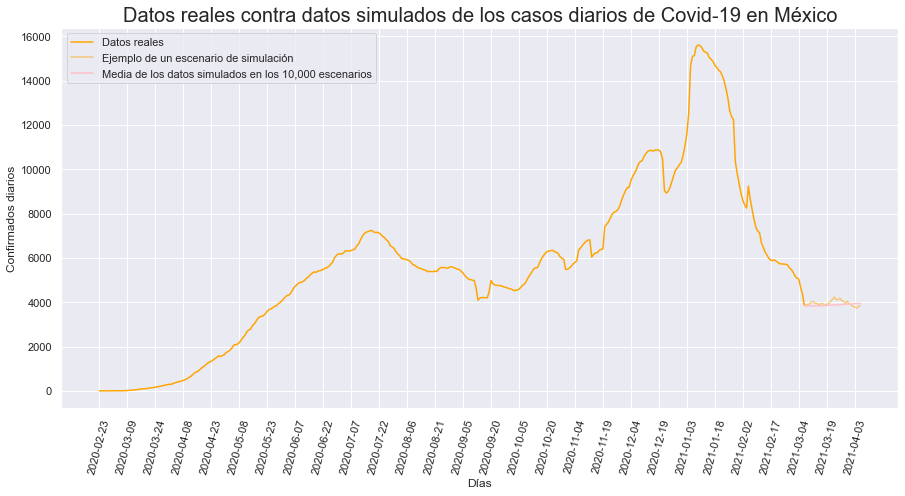

,0
2021-03-07,3849.0000
2021-03-08,3836.4473
2021-03-09,3831.5265
2021-03-10,3827.7031
2021-03-11,3827.4889
2021-03-12,3827.7923
2021-03-13,3829.5322
2021-03-14,3832.2627
2021-03-15,3836.3306
2021-03-16,3839.4634


In [95]:
# Graficar el forecast
def grafica_forecast(forecast: "un escenario", data: "debe ser DataFrame", titulo: "título de la gráfica", 
                     ylabel: "nombre del eje y", no_escenario: "número de escenario del total generado" = 0):
    simulacion = pd.DataFrame(forecast[no_escenario])
    simulacion.index = pd.to_datetime(simulacion.index, unit = "d", origin = pd.Timestamp(pd.to_datetime(data.index[-1])))
    simulacion.index = simulacion.index.astype("str")
    simulacion_media = pd.DataFrame(forecast.mean(axis = 0))
    simulacion_media.index = pd.to_datetime(simulacion_media.index, unit = "d", origin = pd.Timestamp(pd.to_datetime(data.index[-1])))
    simulacion_media.index = simulacion_media.index.astype("str")
    data.index = data.index.astype("str")
    plt.figure(figsize = [15, 7])
    plt.plot(data, color = "orange", label = "Datos reales")
    plt.plot(simulacion, color = "orange", label = "Ejemplo de un escenario de simulación", alpha = 0.5)
    plt.plot(simulacion_media, color = "pink", label = "Media de los datos simulados en los 10,000 escenarios")
    plt.xlabel("Días", fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(titulo, fontsize = 20)
    plt.xticks(rotation = 75, ticks = np.arange(0, len(data) + len(simulacion), 15))
    plt.legend()
    plt.show()
    return simulacion_media.head(10)
sim1 = grafica_forecast(confirmados_esperados1, data_confirmados, 
                        "Datos reales contra datos simulados de los casos diarios de Covid-19 en México (cuarentena nula)",
                        "Confirmados diarios", 3333)
sim1

In [97]:
# Calcular cardinalidad de esta variable en este escenario
def classification(sim, hist):
    if sim < hist.quantile(0.25):
        cardinalidad = 1
    elif hist.quantile(0.25) <= sim < hist.median():
        cardinalidad = 2
    elif hist.median() <= sim < hist.quantile(0.75):
        cardinalidad = 3
    elif hist.quantile(0.75) <= sim:
        cardinalidad = 4
    return cardinalidad
classification(sim1.iloc[-1][0], data_confirmados["SMA7 Confirmados"])

2

##### Variable: Hospitalizados

In [99]:
# Se obtienen de la base de datos los hospitalizados (DataFrame)
data_hospitalizados = pd.DataFrame(data["SMA7 Hospitalizados"]).dropna().astype("int")
data_hospitalizados.head(10)

,SMA7 Hospitalizados
Fecha,
2020-01-04,183
2020-01-05,232
2020-01-06,267
2020-01-07,286
2020-01-08,288
2020-01-09,298
2020-01-10,318
2020-01-11,340
2020-01-12,372


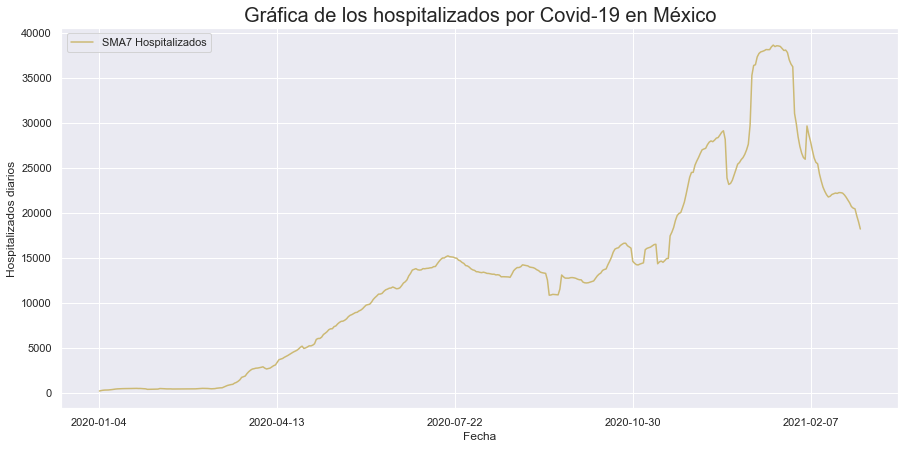

In [101]:
# Gráfica de los datos
graficar_datos(data_hospitalizados, "Gráfica de los hospitalizados por Covid-19 en México", "Hospitalizados diarios")

In [102]:
# Obtener bandwidth adecuado con KernelDensity()
x2 = np.array(data_hospitalizados).flatten()
bandwith_ker2 = bandwidth_KernelD(x2)
bandwith_ker2

{'bandwidth': 1748.4020100502512}

In [103]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
bandwidth_opt2 = bandwidth_KDEM(x2)
bandwidth_opt2

array([244.42853721])

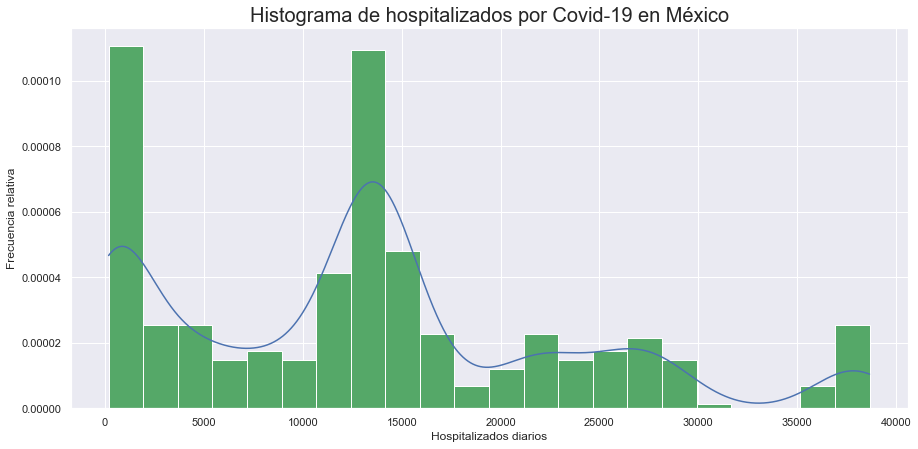

(<function __main__.hist_vs_sklearn.<locals>.<lambda>(datos)>,
 array([  183,   184,   185, ..., 38654, 38655, 38656]))

In [108]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
hist2 = hist_vs_sklearn(bandwith_ker2["bandwidth"], x2, "Histograma de hospitalizados por Covid-19 en México", 
                        "Hospitalizados diarios")
hist2

,sumsquare_error,aic,bic,kl_div
chi,6.249506e-09,332.432732,-10686.318158,0.272062
nakagami,6.274018e-09,332.909957,-10684.638823,0.271204
powerlaw,6.276327e-09,328.062521,-10684.480947,0.334799
mielke,6.495277e-09,336.204315,-10663.708926,0.276704
beta,6.742880e-09,336.225365,-10647.659244,0.287581


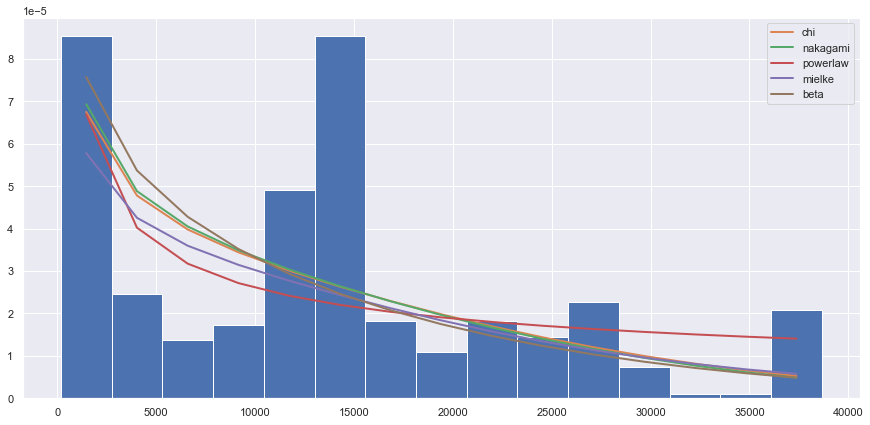

In [117]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
fitter(x2, 15)

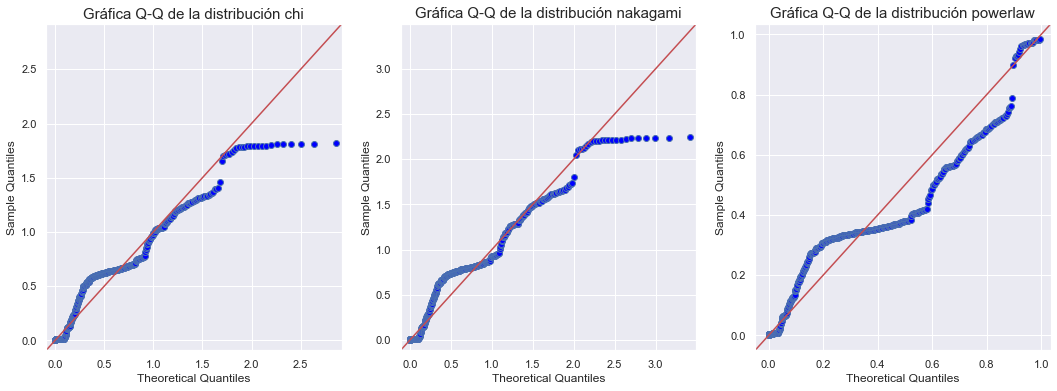

In [118]:
# Gráficas cuartil cuartil
best2 = ["chi", "nakagami", "powerlaw"]
graficas_qq(best2, x2)

In [ ]:
np.random.seed(4567)
graf2 = grafica_acep_rechazo(hist2[1] , hist2[0], 13000, "Hospitalizados", 
                             "Gráfica de aceptación y rechazo para $f(x)$ de hospitalizados")
graf2

# Validación del método con reducción de varianza con muestreo estratificado, con estratos igualmente espaciados
N = 1500
B = N      
U2 = np.random.rand(B)
i = np.arange(0, B)
R2 = (U2 + i) / B
R1 = np.random.uniform(x2.min(), x2.max(), size = N)
V_A2 = Acep_rechazo(R2, R1, graf2[0] , graf2[1], x2)

In [ ]:
# Prueba chi-cuadrada
chi2_2 = prueba_chi2(x2, best2, V_A2)
chi2_2

In [ ]:
# Prueba de Kolmogorov
prueba_kolmogorov(x2, best2, V_A2)

In [ ]:
# Comparación de histogramas
histreal_vs_histva(x2, "Histogramas de distribución ajustada y datos reales de los hospitalizados", "Hospitalizados diarios", 
                   16, va = V_A2)

In [ ]:
# Se establece un limite para tomar los datos consecutivos de la simulación
limite2 = lim_KDE(x2)
limite2

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
hospitalizados_esperados1 = np.array(list(map(lambda x: mes(sem, r1, limite2, x2, V_A2), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim2 = grafica_forecast(hospitalizados_esperados1, data_hospitalizados, 
                        "Datos reales contra datos simulados de los hospitalizados de Covid-19 en México (cuarentena flexible)",
                        "Hospitalizados diarios", 3333)
sim2

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim2.iloc[-1][0], data_hospitalizados["SMA7 Hospitalizados"])

##### Variable: Defunciones

In [ ]:
# Se obtienen de la base de datos las defunciones (DataFrame)
data_defunciones = pd.DataFrame(data["SMA7 Defunciones"]).dropna().astype("int")
data_defunciones.head(10)

In [ ]:
# Gráfica de los datos
graficar_datos(data_defunciones, "Gráfica de las defunciones por Covid-19 en México", "Defunciones diarias")

In [ ]:
# Obtener bandwidth adecuado con KernelDensity()
x3 = np.array(data_defunciones).flatten()
bandwith_ker3 = bandwidth_KernelD(x3)
bandwith_ker3

In [ ]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
bandwidth_opt3 = bandwidth_KDEM(x3)
bandwidth_opt3

In [ ]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
hist3 = hist_vs_sklearn(bandwith_ker3["bandwidth"], x3, "Histograma de las defunciones por Covid-19 en México", 
                        "Defunciones diarias")
hist3

In [ ]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
fitter(x3, 15)

In [ ]:
# Gráficas cuartil cuartil
best3 = ["chi", "nakagami", "powerlaw"]
graficas_qq(best3, x3)

In [ ]:
graf3 = grafica_acep_rechazo(hist3[1] , hist3[0], 13000, "Defunciones", 
                             "Gráfica de aceptación y rechazo para $f(x)$ de defunciones")
graf3

# Validación del método con reducción de varianza por números complementarios
N = 1200 # número de puntos a simular, creemos que aceptará aproximadamente 1200
r2_i = np.random.rand(int(N / 2)) # como estoy tomando t(x) constante solo es necesario generar valores aleatorios U ~ (0, 1)
r2_c = 1 - r2_i
R2 = np.concatenate([r2_i, r2_c])
R1 = np.random.uniform(x3.min(), x3.max(), size = N)
V_A3 = Acep_rechazo(R2, R1, graf3[0] , graf3[1], x3)

In [ ]:
# Prueba chi-cuadrada
chi2_3 = prueba_chi2(x3, best3, V_A3)
chi2_3

In [ ]:
# Prueba de Kolmogorov
prueba_kolmogorov(x3, best3, V_A3)

In [ ]:
# Comparación de histogramas
histreal_vs_histva(x3, "Histogramas de distribución ajustada y datos reales de las defunciones", "Defunciones diarias", 
                   16, va = V_A3)

In [ ]:
# Se establece un limite para tomar los datos consecutivos de la simulación
limite3 = lim_KDE(x3)
limite3

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
defunciones_esperadas1 = np.array(list(map(lambda x: mes(sem, r1, limite3, x3, V_A3), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim3 = grafica_forecast(defunciones_esperadas1, data_defunciones, 
                        "Datos reales contra datos simulados de las defunciones por Covid-19 en México (cuarentena flexible)",
                        "Defunciones diarias", 3333)
sim3

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim3.iloc[-1][0], data_defunciones["SMA7 Defunciones"])

##### Variable: Sospechosos

In [ ]:
# Se obtienen de la base de datos los sospechosos (DataFrame)
data_sospechosos = pd.DataFrame(data["SMA7 Sospechosos"]).dropna().astype("int")
data_sospechosos.head(10)

In [ ]:
# Gráfica de los datos
graficar_datos(data_sospechosos, "Gráfica de los casos sospechosos de Covid-19 en México", "Sospechosos diarios")

In [ ]:
# Obtener bandwidth adecuado con KernelDensity()
x4 = np.array(data_sospechosos).flatten()
bandwith_ker4 = bandwidth_KernelD(x4)
bandwith_ker4

In [ ]:
# Obtener la bandwidth con la función en lugar de un array con KDEMultivariate
bandwidth_opt4 = bandwidth_KDEM(x4)
bandwidth_opt4

In [ ]:
# Se grafica el histograma de los datos junto con la función de densidad obtenida
hist4 = hist_vs_sklearn(bandwith_ker4["bandwidth"], x4, "Histograma de los casos sospechosos de Covid-19 en México", 
                        "Sospechosos diarios")
hist4

In [ ]:
# Encontrar si es que hay, las primeras 3 distribuciones que mejor se ajusten a los datos
fitter(x4, 15)

In [ ]:
# Gráficas cuartil cuartil
best4 = ["chi", "nakagami", "powerlaw"]
graficas_qq(best4, x4)

In [ ]:
graf4 = grafica_acep_rechazo(hist4[1] , hist4[0], 13000, "Sospechosos", 
                             "Gráfica de aceptación y rechazo para $f(x)$ de sospechosos")
graf4

# Validación del método con reducción de varianza con muestreo estratificado, con estratos igualmente espaciados
N = 1500
B = N      
U2 = np.random.rand(B)
i = np.arange(0, B)
R2 = (U2 + i) / B
R1 = np.random.uniform(x4.min(), x4.max(), size = N)
V_A4 = Acep_rechazo(R2, R1, graf4[0] , graf4[1], x4)

In [ ]:
# Prueba chi-cuadrada
chi2_4 = prueba_chi2(x4, best4, V_A4)
chi2_4

In [ ]:
# Prueba de Kolmogorov
prueba_kolmogorov(x4, best4, V_A4)

In [ ]:
# Comparación de histogramas
histreal_vs_histva(x4, "Histogramas de distribución ajustada y datos reales de los sospechosos", "Sospechosos diarios", 
                   16, va = V_A4)

In [ ]:
# Se establece un limite para tomar los datos consecutivos de la simulación
limite4 = lim_KDE(x4)
limite4

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
sospechosos_esperados1 = np.array(list(map(lambda x: mes(sem, r1, limite4, x4, V_A4), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim4 = grafica_forecast(sospechosos_esperados1, data_sospechosos, 
                        "Datos reales contra datos simulados de los casos sospechosos de Covid-19 en México (cuarentena flexible)",
                        "Sospechosos diarios", 3333)
sim4

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim4.iloc[-1][0], data_sospechosos["SMA7 Sospechosos"])

#### <font color = "blue"> Nodo 2:  50% de la población se moviliza durante 30 días (cuarentena flexible) <font color>

##### Variable: Confirmados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r2 = 0.5
confirmados_esperados2 = np.array(list(map(lambda x: mes(sem, r2, limite1, x1, V_A1), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim5 = grafica_forecast(confirmados_esperados2, data_confirmados, 
                        "Datos reales contra datos simulados de los casos diarios de Covid-19 en México (cuarentena flexible)",
                        "Confirmados diarios", 3333)
sim5

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim5.iloc[-1][0], data_confirmados["SMA7 Confirmados"])

##### Variable: Hospitalizados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
confirmados_esperados2 = np.array(list(map(lambda x: mes(sem, r2, limite2, x2, V_A2), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim6 = grafica_forecast(hospitalizados_esperados2, data_hospitalizados, 
                        "Datos reales contra datos simulados de los hospitalizados de Covid-19 en México (cuarentena flexible)",
                        "Hospitalizados diarios", 3333)
sim6

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim6.iloc[-1][0], data_hospitalizados["SMA7 Hospitalizados"])

##### Variable: Defunciones

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
defunciones_esperadas2 = np.array(list(map(lambda x: mes(sem, r2, limite3, x3, V_A3), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim7 = grafica_forecast(defunciones_esperadas2, data_defunciones, 
                        "Datos reales contra datos simulados de las defunciones por Covid-19 en México (cuarentena flexible)",
                        "Defunciones diarias", 3333)
sim7

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim7.iloc[-1][0], data_defunciones["SMA7 Defunciones"])

#### Varible: Sospechosos

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
sospechosos_esperados2 = np.array(list(map(lambda x: mes(sem, r2, limite4, x4, V_A4), range(escenarios)))).astype("int")

In [ ]:
# Graficar el forecast
sim8 = grafica_forecast(sospechosos_esperados2, data_sospechosos, 
                        "Datos reales contra datos simulados de los casos sospechosos de Covid-19 en México (cuarentena flexible)",
                        "Sospechosos diarios", 3333)
sim8

In [ ]:
# Calcular cardinalidad de esta variable en este escenario
classification(sim8.iloc[-1][0], data_sospechosos["SMA7 Sospechosos"])

#### <font color = "blue"> Nodo 3:  25% de la población se moviliza durante 30 días (cuarentena moderada) <font color>

##### Variable: Confirmados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r3 = 0.25

In [ ]:
# Graficar el forecast

In [ ]:
# Calcular cardinalidad de esta variable en este escenario

##### Variable: Hospitalizados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)

In [ ]:
# Graficar el forecast

In [ ]:
# Calcular cardinalidad de esta variable en este escenario

##### Variable: Defunciones

##### Variable: Sospechosos

#### <font color = "blue">  Nodo 4:  10% de la población se moviliza durante 30 días (cuarentena estricta) <font color>

##### Variable: Confirmados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)
r4 = 0.1

In [ ]:
# Graficar el forecast

In [ ]:
# Calcular cardinalidad de esta variable en este escenario

##### Variable: Hospitalizados

In [ ]:
# Se hace una función que simula 30 días tomando valores de la distribución dentro de los limites establecidos
np.random.seed(4567)

In [ ]:
# Graficar el forecast

In [ ]:
# Calcular cardinalidad de esta variable en este escenario

##### Variable: Defunciones

##### Variable: Sospechosos

### 1.7 Referencias.
1. Consejo Nacional de Ciencia y Tecnología (2021). *Covid-19 México*. Recuperado 13 marzo 2021, de https://datos.covid-19.conacyt.mx/#DownZCSV
2. Instituto Mexicano del Seguro Social (s. f.). *Definiciones opercaciones de casos Covid-19*. Recuperado de http://educacionensalud.imss.gob.mx/es/system/files/Definiciones_operacionales_de_casos_COVID-19.pdf
3. World Health Organization. (2021). *WHO Coronavirus Disease (Covid-19) Dashboard*. Recuperado 7 marzo 2021 de https://covid19.who.int/

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>